In [126]:
import pandas as pd 
import quandl 
quandl.ApiConfig.api_key ="co-y5EAq-HFsEZZF9H4_"
%matplotlib inline

In [127]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2019-01-24')

In [128]:
aapl = quandl.get('WIKI/AAPL.11', start_date= start, end_date= end)
csco = quandl.get('WIKI/CSCO.11', start_date= start, end_date= end)
ibm = quandl.get('WIKI/IBM.11', start_date= start, end_date= end)
amzn = quandl.get('WIKI/AMZN.11', start_date= start, end_date= end)

In [129]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df['normed return'] = stock_df['Adj. Close']/ stock_df.iloc[0]['Adj. Close'] 

In [130]:
aapl.tail()

,Adj. Close,normed return
Date,,
2018-03-21,171.270,1.492999
2018-03-22,168.845,1.471860
2018-03-23,164.940,1.437819
2018-03-26,172.770,1.506075
2018-03-27,168.340,1.467458


In [131]:
for stock_df ,allocation in zip ((aapl, csco, ibm, amzn),[.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['normed return']* allocation

In [132]:
aapl.head()

,Adj. Close,normed return,Allocation
Date,,,
2017-01-03,114.715378,1.000000,0.300000
2017-01-04,114.586983,0.998881,0.299664
2017-01-05,115.169696,1.003960,0.301188
2017-01-06,116.453639,1.015153,0.304546
2017-01-09,117.520300,1.024451,0.307335


In [133]:
for stock_df in (aapl, csco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']* 1000000

In [134]:
all_pos_vals = [aapl['Position Values'], csco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [135]:
portfolio_val.columns=['Aapl-position', 'Csco-position', 'IBM-Position', 'AMZN-Position']

In [136]:
portfolio_val['Total Pos']= portfolio_val.sum(axis=1)

In [137]:
portfolio_val.tail()

,Aapl-position,Csco-position,IBM-Position,AMZN-Position,Total Pos
Date,,,,,
2018-03-21,447899.845554,300559.956517,389437.415654,209887.616596,1.347785e+06
2018-03-22,441558.062840,292148.890255,378004.573022,204877.466265,1.316589e+06
2018-03-23,431345.831294,287739.863585,370051.291191,198436.981703,1.287574e+06
2018-03-26,451822.597749,298864.177029,381185.885754,206437.830881,1.338310e+06
2018-03-27,440237.402935,289503.474253,377557.200919,198634.680961,1.305933e+06


In [138]:
import matplotlib.pyplot as plt 

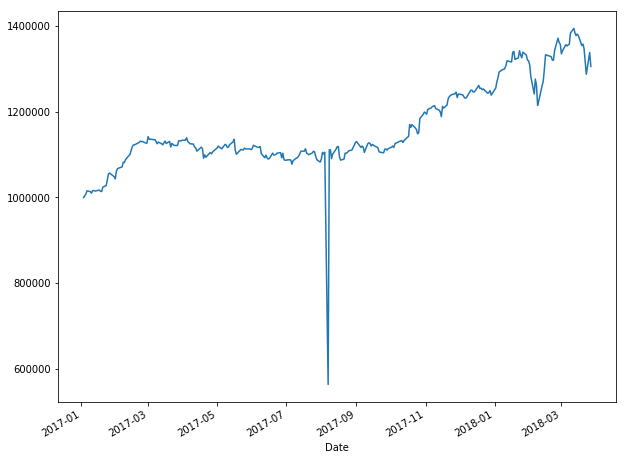

In [140]:
portfolio_val['Total Pos'].plot(figsize=(10,8))

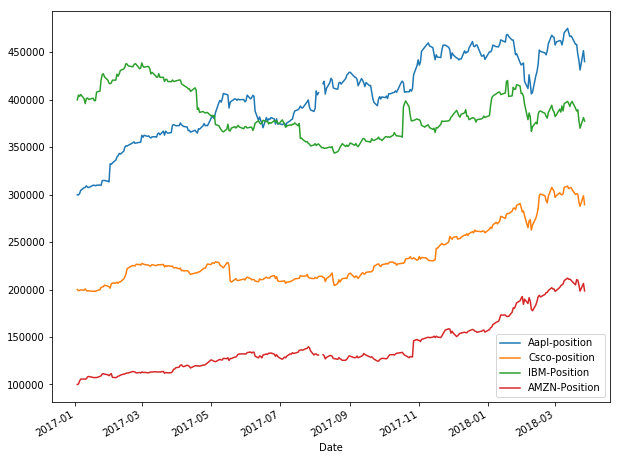

In [142]:
portfolio_val.drop(['Total Pos'], axis=1).plot(figsize=(10,8))

In [143]:
portfolio_val['Daily Return']= portfolio_val['Total Pos'].pct_change(1)

In [146]:
portfolio_val.head()

,Aapl-position,Csco-position,IBM-Position,AMZN-Position,Total Pos,Daily Return
Date,,,,,,
2017-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2017-01-04,299664.227292,198821.218075,404952.449309,100465.721072,1.003904e+06,0.003904
2017-01-05,301188.118812,199283.593000,403612.656259,103553.279287,1.007638e+06,0.003720
2017-01-06,304545.845889,199679.914365,405598.420958,105615.189672,1.015439e+06,0.007743
2017-01-09,307335.342230,199349.646561,401100.544291,105738.585853,1.013524e+06,-0.001886


In [155]:
portfolio_val['Daily Return'].describe()



count    307.000000
mean       0.004058
std        0.056098
min       -0.036721
25%       -0.002909
50%        0.000743
75%        0.005013
max        0.971590
Name: Daily Return, dtype: float64

In [156]:
portfolio_val['Daily Return'].mean()

0.004057860076815067

In [157]:
portfolio_val['Daily Return'].std()

0.05609796954237837

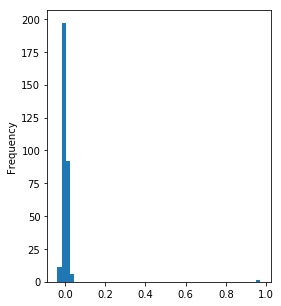

In [161]:
portfolio_val['Daily Return'].plot(kind='hist', bins =50, figsize=(4,5))

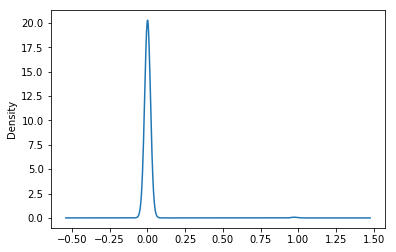

In [165]:
portfolio_val['Daily Return'].plot(kind='kde')

In [197]:
cummulative_return = 100* (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [198]:
cummulative_return

30.08547220892912

In [213]:
portfolio_val['Total Pos'][-1]

1305932.759067867

In [250]:
annual_rate = 0.027
daily_rate = annual_rate/365
daily_rate

7.397260273972603e-05

In [251]:
SR = ((portfolio_val['Daily Return']-daily_rate).mean())/portfolio_val['Daily Return'].std()

In [252]:
Anualized_SharpeRatio = (252**0.5)*SR

In [253]:
Anualized_SharpeRatio

1.1273536914421953